In [65]:
#Import des librairies:

import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#chemin des données:
path_data='/content/drive/MyDrive/OC Asma - Tahri/P04/Data/'

In [68]:
#import des données:

data=pd.read_csv(path_data+'data_nettoyee.csv')
data.drop('Unnamed: 0',1,inplace=True)
data

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Latitude,Longitude,SiteEnergyUseWN(kBtu)_log,TotalGHGEmissions_log
0,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.000000,no informations,0.0,65.0,7.097539e+06,249.430000,14.0,31.0,47.612190,-122.337997,15.775259,5.523179
1,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000000,Parking,15064.0,51.0,8.765788e+06,263.510000,14.0,31.0,47.613106,-122.333358,15.986367,5.577879
2,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,62169.166767,Parking,100000.0,18.0,3.911926e+06,82.948022,56.0,31.0,47.613349,-122.337699,15.179541,4.430198
3,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.000000,no informations,0.0,1.0,2.836344e+07,82.948022,56.0,31.0,47.614216,-122.336609,17.160612,4.430198
4,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.000000,Parking,68009.0,67.0,1.507824e+07,507.700000,56.0,31.0,47.613754,-122.340924,16.528763,6.231858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,Nonresidential COS,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.000000,no informations,0.0,46.0,9.430032e+05,20.940000,0.0,0.0,47.567220,-122.311540,13.756826,3.088311
6712,Nonresidential COS,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.000000,no informations,0.0,0.0,1.053706e+06,32.170000,0.0,0.0,47.596250,-122.322830,13.867825,3.501646
6713,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.000000,Fitness Center/Health Club/Gym,5574.0,0.0,6.053764e+06,223.540000,0.0,0.0,47.636440,-122.357840,15.616191,5.414054
6714,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.000000,Fitness Center/Health Club/Gym,6501.0,0.0,7.828413e+05,22.110000,0.0,0.0,47.528320,-122.324310,13.570687,3.140265


### Analyse Multivariée

In [69]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns.tolist()

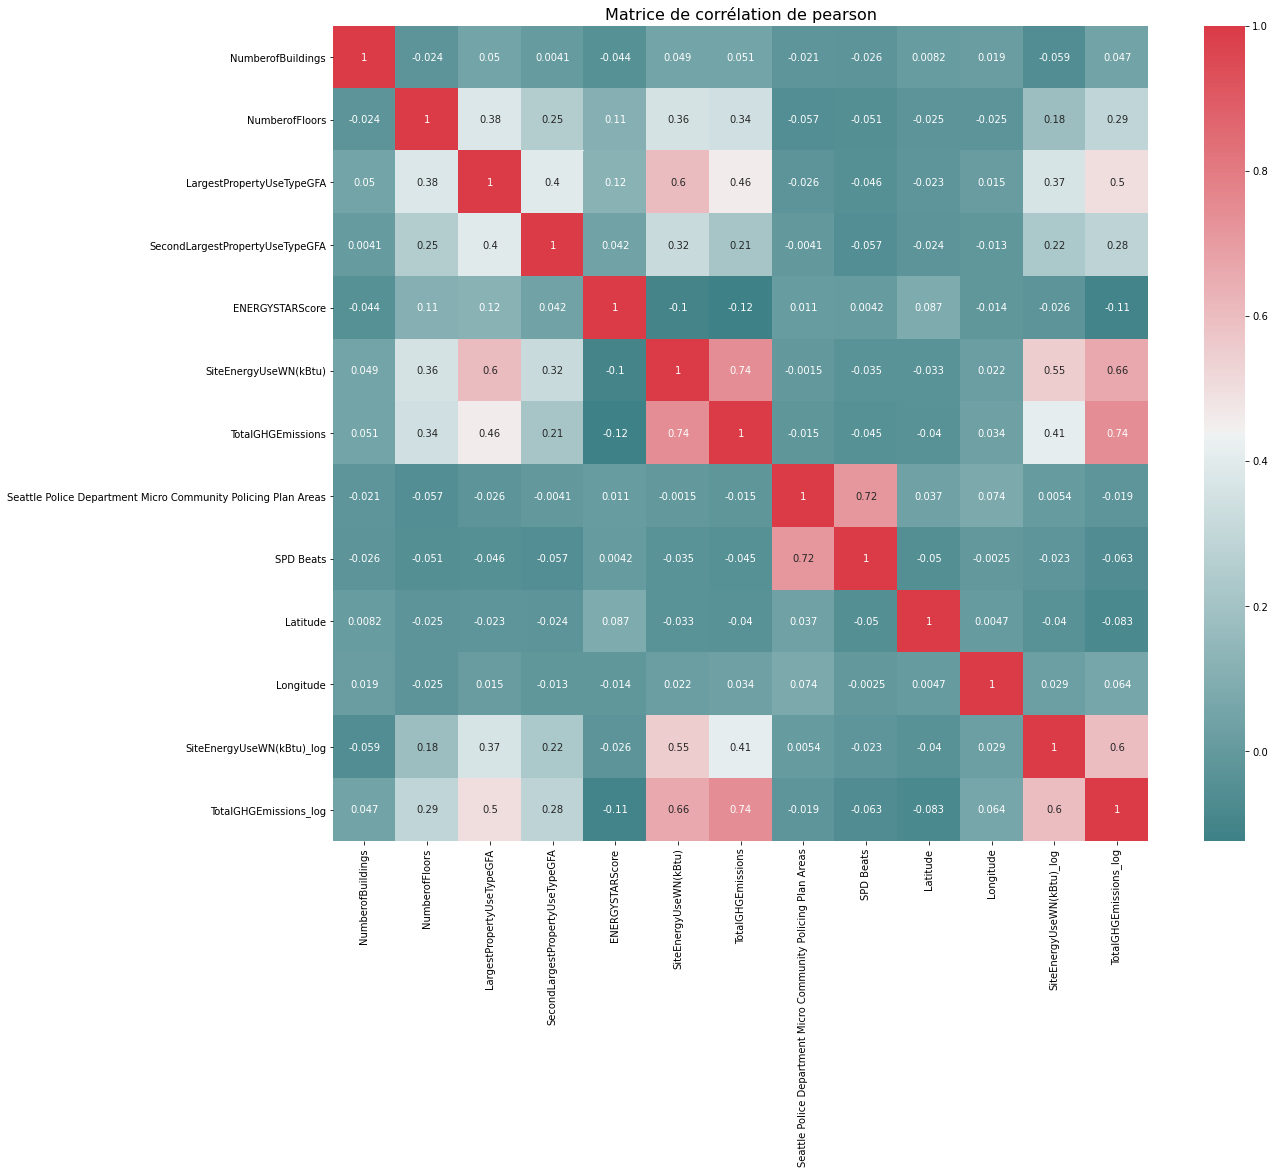

In [70]:
import seaborn as sns
corrMatrix= data[numeric_columns].corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(corrMatrix, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True)
plt.title('Matrice de corrélation de pearson', size=16)
plt.show()

On remarque une correlation entre les variables log que nous avons rajouté et les variables initiales.

On remarque l'absecence de corrélations entre les variables explicatives choisies

#Choix des features:

In [101]:
data.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'Latitude',
 'Longitude',
 'SiteEnergyUseWN(kBtu)_log',
 'TotalGHGEmissions_log']

In [102]:
data.BuildingType.dtype

dtype('O')

In [103]:
y_energy=data['SiteEnergyUseWN(kBtu)_log']
y_gaz=data['TotalGHGEmissions_log']

In [230]:
#Features:
columns_X=data.copy()

In [105]:
columns_X

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Latitude,Longitude,SiteEnergyUseWN(kBtu)_log,TotalGHGEmissions_log
0,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.000000,no informations,0.0,65.0,7.097539e+06,249.430000,14.0,31.0,47.612190,-122.337997,15.775259,5.523179
1,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.000000,Parking,15064.0,51.0,8.765788e+06,263.510000,14.0,31.0,47.613106,-122.333358,15.986367,5.577879
2,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,62169.166767,Parking,100000.0,18.0,3.911926e+06,82.948022,56.0,31.0,47.613349,-122.337699,15.179541,4.430198
3,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.000000,no informations,0.0,1.0,2.836344e+07,82.948022,56.0,31.0,47.614216,-122.336609,17.160612,4.430198
4,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.000000,Parking,68009.0,67.0,1.507824e+07,507.700000,56.0,31.0,47.613754,-122.340924,16.528763,6.231858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,Nonresidential COS,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.000000,no informations,0.0,46.0,9.430032e+05,20.940000,0.0,0.0,47.567220,-122.311540,13.756826,3.088311
6712,Nonresidential COS,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.000000,no informations,0.0,0.0,1.053706e+06,32.170000,0.0,0.0,47.596250,-122.322830,13.867825,3.501646
6713,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.000000,Fitness Center/Health Club/Gym,5574.0,0.0,6.053764e+06,223.540000,0.0,0.0,47.636440,-122.357840,15.616191,5.414054
6714,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.000000,Fitness Center/Health Club/Gym,6501.0,0.0,7.828413e+05,22.110000,0.0,0.0,47.528320,-122.324310,13.570687,3.140265


In [231]:
columns_X.drop(['SiteEnergyUseWN(kBtu)','SiteEnergyUseWN(kBtu)_log','TotalGHGEmissions','TotalGHGEmissions_log'],1,inplace=True)

Pour notre étude nous allons nous intéressér aux deux variables cibles:

**SiteEnergyUseWN(kBtu)** et **GHGEmissions(MetricTonsCO2e)**

Afin d'évaluer l’intérêt de l' **ENERGY STAR Score** pour nos modèles, je vais lancer les modèles avec et sans cette variable:

## Consommation d'énergie (SiteEnergyUseWN(kBtu)):

In [107]:
#la target
y=y_energy

#### Préparation des données:

In [78]:
object_columns= columns_X.select_dtypes(include = ['object']).columns.tolist()
object_columns

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType']

In [232]:
#codification des variables non numérique:
# columns_X.Neighborhood=pd.Categorical(columns_X.Neighborhood)
# columns_X['Neighborhood_code']= columns_X.Neighborhood.cat.codes

columns_X.LargestPropertyUseType=pd.Categorical(columns_X.LargestPropertyUseType)
columns_X['LargestPropertyUseType_code']= columns_X.LargestPropertyUseType.cat.codes


columns_X.ListOfAllPropertyUseTypes=pd.Categorical(columns_X.ListOfAllPropertyUseTypes)
columns_X['ListOfAllPropertyUseTypes_code']= columns_X.ListOfAllPropertyUseTypes.cat.codes

# columns_X.BuildingType=pd.Categorical(columns_X.BuildingType)
# columns_X['BuildingType_code']= columns_X.BuildingType.cat.codes

columns_X.PrimaryPropertyType=pd.Categorical(columns_X.PrimaryPropertyType)
columns_X['PrimaryPropertyType_code']= columns_X.PrimaryPropertyType.cat.codes

columns_X.SecondLargestPropertyUseType=pd.Categorical(columns_X.SecondLargestPropertyUseType)
columns_X['SecondLargestPropertyUseType_code']= columns_X.SecondLargestPropertyUseType.cat.codes


In [233]:
columns_X.drop(['ListOfAllPropertyUseTypes','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType'],1,inplace=True)

In [110]:
columns_X.isna().sum()

BuildingType                                                     0
CouncilDistrictCode                                              0
Neighborhood                                                     0
YearBuilt                                                        0
NumberofBuildings                                                0
NumberofFloors                                                   0
PropertyGFATotal                                                 0
PropertyGFAParking                                               0
PropertyGFABuilding(s)                                           0
LargestPropertyUseTypeGFA                                        0
SecondLargestPropertyUseTypeGFA                                  0
ENERGYSTARScore                                                  0
Seattle Police Department Micro Community Policing Plan Areas    0
SPD Beats                                                        0
Latitude                                                      

In [111]:
# columns_X.dropna(how = 'all', axis=0, inplace=True)

In [115]:
# numeric_columns = columns_X.select_dtypes(include = ['int32','float64']).columns.tolist()
numeric_columns=['NumberofBuildings',
 'NumberofFloors',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'Latitude',
 'Longitude',
 'LargestPropertyUseType_code',
'ListOfAllPropertyUseTypes_code',
'PrimaryPropertyType_code',
'SecondLargestPropertyUseType_code']


In [234]:
object_columns= columns_X.select_dtypes(include = ['object']).columns.tolist()
object_columns

['BuildingType', 'Neighborhood']

In [83]:
#data.iloc[6474]

In [84]:
#columns_X.iloc[3175]

In [235]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler


encod = OneHotEncoder(sparse=False)
scal = StandardScaler()
columns_X[numeric_columns] = scal.fit_transform(columns_X[numeric_columns])
encod.fit_transform(columns_X[object_columns])

columns_X = pd.merge(columns_X[numeric_columns], 
          pd.DataFrame(columns = encod.get_feature_names().tolist(),
              data = encod.fit_transform(columns_X[object_columns])),
        left_index = True, right_index = True)



In [236]:
len(columns_X.columns)

40

En appliquant le OneHotencoder sur l'ensemble des variables categorielles, nous nous retrouvons avec 666 colonnes ce qui rend le temps de calcul pour les modèles très long. Nous n'allons donc l'utiliser que pour les deux variables **Neighborhood** et **BuildingType**. 

### Modèles avec ENERGYSTARScore

In [87]:
#On définit le nombre total d'étages:
#data['NumberofFloorstotal']=data['NumberofFloors']*data['NumberofBuildings']

In [88]:
#data.drop(['NumberofFloors','NumberofBuildings'],1,inplace=True)

In [237]:
X=columns_X.copy()#les features
y=y_energy

In [90]:
#Normaliser les données:
# from sklearn import preprocessing 

# sdt_scale=preprocessing.StandardScaler().fit(X)
# X_scaled=sdt_scale.transform(X)

In [119]:
#spliter les données en trainset et testset:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape)

(4499, 40) (2217, 40)


In [120]:
y_train

3418    15.109511
3838    14.935870
627     15.846329
4946    15.963916
5644    14.787301
          ...    
87      14.353033
163     16.214787
5658    15.276846
987     11.789124
3928    15.691757
Name: SiteEnergyUseWN(kBtu)_log, Length: 4499, dtype: float64

In [121]:
#tableau de comparaison des modeles regression:
models_array = np.array([['Linear Regression',0,0,0,0], ['Ridge Regression',0,0,0,0], ['Lasso Regression',0,0,0,0],
                         ['Elasticnet Regression',0,0,0,0],['Decision Tree',0,0,0,0],['Decision Tree Tun',0,0,0,0],
                         ['Random Forest',0,0,0,0],['Random Forest Tun',0,0,0,0],['SVR',0,0,0,0],['XG Boost',0,0,0,0]])
comparative_table = pd.DataFrame(models_array, columns = ['Model','Features','Score_RMSE','R2','Time'])
comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,0,0,0,0
1,Ridge Regression,0,0,0,0
2,Lasso Regression,0,0,0,0
3,Elasticnet Regression,0,0,0,0
4,Decision Tree,0,0,0,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


#### Linear Regression, Ridge, Lasso et ElasticNet:

In [123]:
#Regression lineaire:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score


lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

rmse=mean_squared_error(y_test,lr.predict(X_test),)
r2 = r2_score(y_test,lr.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


Lerreur quadratique moyenne est 2.0480235199717907
le score R2 est 0.20496773766740017


In [124]:
#completer le tableau:
mask=comparative_table['Model']=='Linear Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse
comparative_table.loc[mask,'R2']=r2
comparative_table.loc[mask,'Features']=X_train.shape[1]
comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,0,0,0,0
2,Lasso Regression,0,0,0,0
3,Elasticnet Regression,0,0,0,0
4,Decision Tree,0,0,0,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [125]:
#Ridge avec une optimisation de parametres:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1, 10]}
ridge=linear_model.Ridge()
gridge = Ridge_reg= GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=10)
gridge.fit(X_train, y_train)

print(gridge.best_estimator_)

#recupération des meilleurs paramètres et calcul de RMSE et R^2:

best_model = gridge.best_estimator_
best_model.fit(X_train, y_train)

rmse_ridge=mean_squared_error(y_test,best_model.predict(X_test))
r2_ridge = r2_score(y_test,best_model.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_ridge))
print('le score R2 est {}'.format(r2_ridge))


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
--------------------------------------
Lerreur quadratique moyenne est 2.05899628525082
le score R2 est 0.20070816627148602


In [126]:
#completer le tableau:
mask=comparative_table['Model']=='Ridge Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_ridge
comparative_table.loc[mask,'R2']=r2_ridge
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,0,0,0,0
3,Elasticnet Regression,0,0,0,0
4,Decision Tree,0,0,0,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [127]:
#Lasso:

parameters = {'alpha':[1, 10]}
lasso=linear_model.Lasso()
lasso = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=10)
lasso.fit(X_train, y_train)

print(lasso.best_estimator_)

best_model_lasso = lasso.best_estimator_
best_model_lasso.fit(X_train, y_train)

rmse_lasso=mean_squared_error(y_test,best_model_lasso.predict(X_test))
r2_lasso = r2_score(y_test,best_model.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_lasso))
print('le score R2 est {}'.format(r2_lasso))

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
--------------------------------------
Lerreur quadratique moyenne est 2.5760705388750207
le score R2 est 0.20070816627148602


In [128]:
#completer le tableau:
mask=comparative_table['Model']=='Lasso Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_lasso
comparative_table.loc[mask,'R2']=r2_lasso
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,0,0,0,0
4,Decision Tree,0,0,0,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [129]:
#Elastic Net:
from sklearn.linear_model import ElasticNet

start_time = time.clock()


parameters = {'tol' : [0.1,0.01,0.001,0.0001],'alpha':[1, 10],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic=linear_model.ElasticNet()
gelastic= GridSearchCV(elastic,parameters,scoring = 'neg_mean_squared_error',cv=10)

gelastic.fit(X_train, y_train)

best_model_elastic = gelastic.best_estimator_
best_model_elastic.fit(X_train, y_train)

rmse_elastic=mean_squared_error(y_test,best_model_elastic.predict(X_test))
r2_elastic = r2_score(y_test,best_model.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_elastic))
print('le score R2 est {}'.format(r2_elastic))

elastic_running_time=time.clock() - start_time
print('\n\n',elastic_running_time, "seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5877.231933688678, tolerance: 1283.393704216985
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5518.072467642619, tolerance: 1215.1639223977895
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.00694292609

--------------------------------------
Lerreur quadratique moyenne est 2.2052288121661303
le score R2 est 0.20070816627148602


 60.368529999999964 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6245.908775807503, tolerance: 1371.9161527683445
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [130]:
#completer le tableau:
mask=comparative_table['Model']=='Elasticnet Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_elastic
comparative_table.loc[mask,'Time']=elastic_running_time
comparative_table.loc[mask,'R2']=r2_elastic
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,0,0,0,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


#### Decision Tree et Random Forest:

In [131]:
#Arbre de décision:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

rmse_dtr=mean_squared_error(y_test,dtr.predict(X_test))
r2_dtr = r2_score(y_test,dtr.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse_dtr))


Lerreur quadratique moyenne est 2.900812053984729


In [132]:
#completer le tableau:
mask=comparative_table['Model']=='Decision Tree'
comparative_table.loc[mask,'Score_RMSE']=rmse_dtr
comparative_table.loc[mask,'R2']=r2_dtr
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,0,0,0,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [133]:
#Arbre de décision avec une optimisation de parametres:
from sklearn.metrics import r2_score,make_scorer

scoring = make_scorer(r2_score)

grid_dec=GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_dec.fit(X_train, y_train)

print(grid_dec.best_estimator_)

result = grid_dec.cv_results_

rmse_grid_dec=mean_squared_error(y_test,grid_dec.best_estimator_.predict(X_test))
r2_grid_dec = r2_score(y_test,grid_dec.best_estimator_.predict(X_test) )


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [134]:
#completer le tableau:
mask=comparative_table['Model']=='Decision Tree Tun'
comparative_table.loc[mask,'Score_RMSE']=rmse_grid_dec
comparative_table.loc[mask,'R2']=r2_grid_dec
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,40,2.4941,0.0318041,0
6,Random Forest,0,0,0,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [135]:
#Random Forest:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=42)
reg_rf.fit(X_train, y_train)

rmse_reg_rf=mean_squared_error(y_test,reg_rf.predict(X_test))
r2_reg_rf = r2_score(y_test,reg_rf.predict(X_test))


print('Lerreur quadratique moyenne est {}'.format(rmse_dtr))

Lerreur quadratique moyenne est 2.900812053984729


In [136]:
#completer le tableau:
mask=comparative_table['Model']=='Random Forest'
comparative_table.loc[mask,'Score_RMSE']=rmse_reg_rf
comparative_table.loc[mask,'R2']=r2_reg_rf
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,40,2.4941,0.0318041,0
6,Random Forest,40,1.73642,0.325932,0
7,Random Forest Tun,0,0,0,0
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


In [137]:
import time

start_time = time.clock()

parameters = {
    'n_estimators' : [20,50,100,200,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

rf_running_time=time.clock() - start_time
print(rf_running_time, "seconds")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.8s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.9min finished


419.5399010000001 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [138]:
rfr_search.best_params_
rmse_rf=mean_squared_error(y_test,rfr_search.best_estimator_.predict(X_test))
r2_rf = r2_score(y_test,rfr_search.best_estimator_.predict(X_test))


print('Lerreur quadratique moyenne est {}'.format(rmse_rf))

Lerreur quadratique moyenne est 1.417982294359923


In [139]:
#completer le tableau:
mask=comparative_table['Model']=='Random Forest Tun'
comparative_table.loc[mask,'Score_RMSE']=rmse_rf
comparative_table.loc[mask,'R2']=r2_rf
comparative_table.loc[mask,'Time']=rf_running_time
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,40,2.4941,0.0318041,0
6,Random Forest,40,1.73642,0.325932,0
7,Random Forest Tun,40,1.41798,0.449547,419.54
8,SVR,0,0,0,0
9,XG Boost,0,0,0,0


#### SVR:

In [140]:
from sklearn.svm import SVR

start_time = time.clock()


parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

svm_running_time=time.clock() - start_time
print(svm_running_time, "seconds")

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.0s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 21.0min finished


1258.1391879999999 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [141]:
svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

In [142]:
rmse_svr=mean_squared_error(y_test,svm.predict(X_test))
r2_svr = r2_score(y_test,svm.predict(X_test))


In [143]:
#completer le tableau:
mask=comparative_table['Model']=='SVR'
comparative_table.loc[mask,'Score_RMSE']=rmse_svr
comparative_table.loc[mask,'Time']=svm_running_time
comparative_table.loc[mask,'R2']=r2_svr
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,40,2.4941,0.0318041,0
6,Random Forest,40,1.73642,0.325932,0
7,Random Forest Tun,40,1.41798,0.449547,419.54
8,SVR,40,1.63296,0.366092,1258.14
9,XG Boost,0,0,0,0


#### XG Boost:

In [144]:
from xgboost import XGBRegressor

start_time = time.clock()

parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)
xgb_running_time=time.clock() - start_time
print(xgb_running_time, "seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[17:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=100, score=0.491, total=   0.5s
[CV] n_estimators=100 ................................................
[17:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.425, total=   0.4s
[CV] n_estimators=100 ................................................
[17:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.444, total=   0.4s
[CV] n_estimators=100 ................................................
[17:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.224, total=   0.4s
[CV] n_estimators=100 ................................................
[17:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.358, total=   0.4s
[CV] n_estimators=500 ................................................
[17:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.550, total=   1.9s
[CV] n_estimators=500 ................................................
[17:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.309, total=   1.9s
[CV] n_estimators=500 ................................................
[17:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.428, total=   1.9s
[CV] n_estimators=500 ................................................
[17:47:44] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


134.04479100000026 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [145]:
print('XG Boost best parametrs: ',xgb_grid.best_params_,'\nXG Boost best estimator: ',xgb_grid.best_estimator_)

XG Boost best parametrs:  {'n_estimators': 100} 
XG Boost best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [146]:
rmse_xgb=mean_squared_error(y_test,xgb_grid.best_estimator_.predict(X_test))
r2_xgb = r2_score(y_test,xgb_grid.best_estimator_.predict(X_test))

In [147]:
#completer le tableau:
mask=comparative_table['Model']=='XG Boost'
comparative_table.loc[mask,'Score_RMSE']=rmse_xgb
comparative_table.loc[mask,'R2']=r2_xgb
comparative_table.loc[mask,'Time']=xgb_running_time
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Linear Regression,40,2.04802,0.204968,0
1,Ridge Regression,40,2.059,0.200708,0
2,Lasso Regression,40,2.57607,0.200708,0
3,Elasticnet Regression,40,2.20523,0.200708,60.3685
4,Decision Tree,40,2.90081,-0.12608,0
5,Decision Tree Tun,40,2.4941,0.0318041,0
6,Random Forest,40,1.73642,0.325932,0
7,Random Forest Tun,40,1.41798,0.449547,419.54
8,SVR,40,1.63296,0.366092,1258.14
9,XG Boost,40,1.46902,0.429735,134.045


#### Comapraison des modèles:

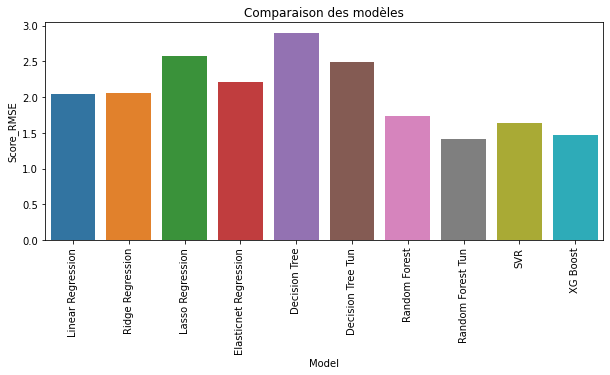

In [148]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Score_RMSE'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

XG Boost est le modèle avec l'erreur quadratique la moins importante

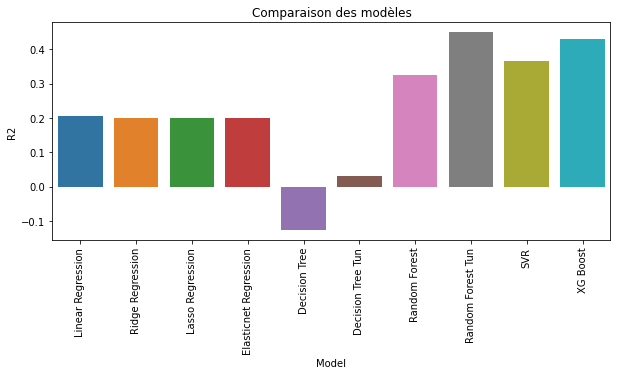

In [149]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['R2'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

In [150]:
comparative_table['Time']=comparative_table['Time'].astype(float)

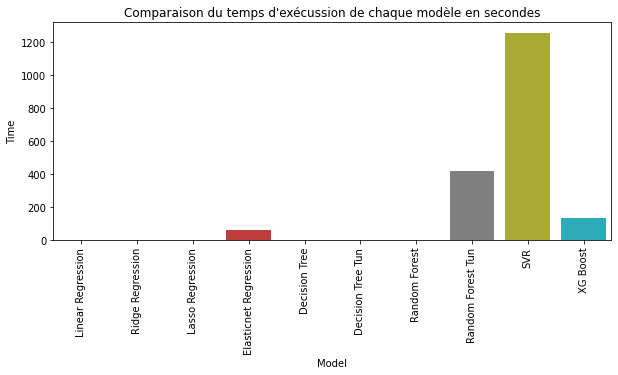

In [151]:
plt.figure(figsize=(10,4))
plt.title('Comparaison du temps d\'exécussion de chaque modèle en secondes')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Time'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90,
                     )
ax = plt.gca()
plt.show()

XG Boost est le modèle le plus rapide

# Importation du modèle choisi

Le choix porte sur le modèle XG Booste qui a les meilleures performances

In [152]:
import pickle

filename = path_data+'Models/xgb_grid_energy.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(xgb_grid.best_estimator_, filehandler)

#### Explicabilité du modèle choisi:

**Nous allons essayer dans cette section d'expliquer l'importance de la variable "ENERGYSTARScore" dans notre modèle , ainsi que toutes les variables que nous avons utiliser dans l'entrainement de notre modèle:**

In [153]:
!pip install shap

     |████████████████████████████████| 358kB 6.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=db7da99e06c36e8ca83a0421ba4874d15b66241b3cccdc80bee571c05d416a46
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [154]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", lr.coef_[i].round(4))

Model coefficients:

NumberofBuildings = 0.0363
NumberofFloors = -0.0289
LargestPropertyUseTypeGFA = 0.5191
SecondLargestPropertyUseTypeGFA = 0.0222
ENERGYSTARScore = -0.0135
Seattle Police Department Micro Community Policing Plan Areas = 0.0128
SPD Beats = 0.0168
Latitude = 0.0241
Longitude = 0.1307
LargestPropertyUseType_code = 0.0823
ListOfAllPropertyUseTypes_code = -0.013
PrimaryPropertyType_code = -0.0795
SecondLargestPropertyUseType_code = -0.0959
x0_Campus = 0.7321
x0_Multifamily HR (10+) = 0.4205
x0_Multifamily LR (1-4) = -0.4283
x0_Multifamily MR (5-9) = -0.0248
x0_NonResidential = 0.1011
x0_Nonresidential COS = 0.4812
x0_Nonresidential WA = 0.0
x0_SPS-District K-12 = -1.2818
x1_BALLARD = 0.1887
x1_Ballard = -0.0492
x1_CENTRAL = -0.1411
x1_Central = -0.663
x1_DELRIDGE = 0.4527
x1_DELRIDGE NEIGHBORHOODS = -0.5097
x1_DOWNTOWN = 0.1644
x1_Delridge = 0.3149
x1_EAST = 0.1646
x1_GREATER DUWAMISH = -0.1348
x1_LAKE UNION = 0.2335
x1_MAGNOLIA / QUEEN ANNE = 0.0478
x1_NORTH = -0.1448
x1

les coefficients pour chaque variable du modèle de regression lineaire nous donnent une idée sur l'importance de chaque variable, mais nous avons pas assez de précision, nous allons essayer de comprendre mieux avec **SHAP**

In [156]:
import shap
# SHAP pour le modele lineaire:
explainer = shap.Explainer(lr.predict, X[:100])
shap_values = explainer(X)



Permutation explainer: 6717it [06:19, 17.68it/s]


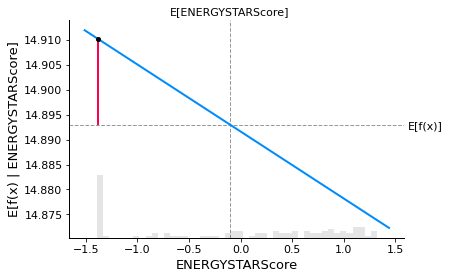

In [157]:
# pour ENERGYSTARScore lineairement:
sample_ind = 5
shap.partial_dependence_plot(
    "ENERGYSTARScore", lr.predict, X[:100], model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

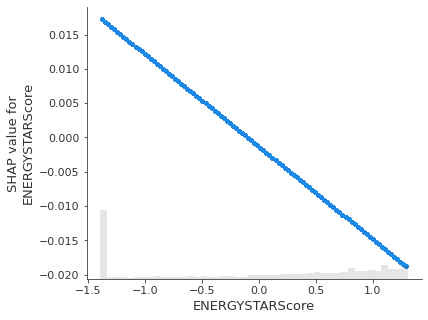

In [158]:
shap.plots.scatter(shap_values[:,"ENERGYSTARScore"])

la relartion entre la variable "ENERGYSTARScore" et sa valeur shap est parfaitement anticorrélée

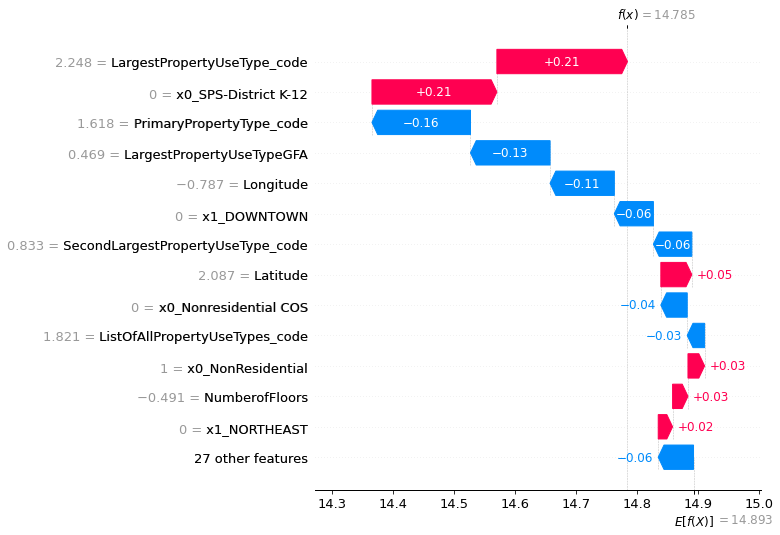

In [159]:
shap.plots.waterfall(shap_values[60], max_display=14)

le graphique en cascade nous montre l'impact de chaque variable sur le résultat final du modèle. la variable la plus importante est "LargestPropertyUseTypeGFA" qui impact négativement la prédiction du modèle.

In [160]:
# from xgboost import plot_importance
# plot_importance(xgb_grid.best_estimator_,)

In [161]:
#XG Boost model:
explainer_xgb = shap.Explainer(xgb_grid.best_estimator_, X[:100])
shap_values_xgb = explainer_xgb(X)

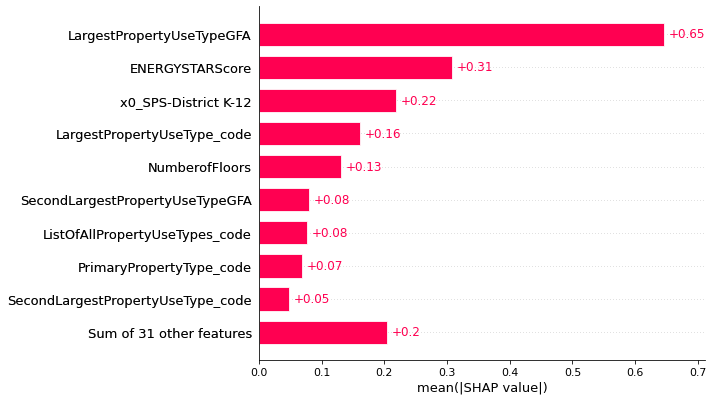

In [162]:
#Importance des variable pour le modèle XG Boost:
shap.plots.bar(shap_values_xgb)

Pour le modèle XG Boost, la variable "Seattle Police Department Micro Community Policing Plan Areas" est la plus importante, suivie de la variable "SecondLargestPropertyUseTypeGFA" et la variable "ENERGYSTARScore" vient en 3ème position.

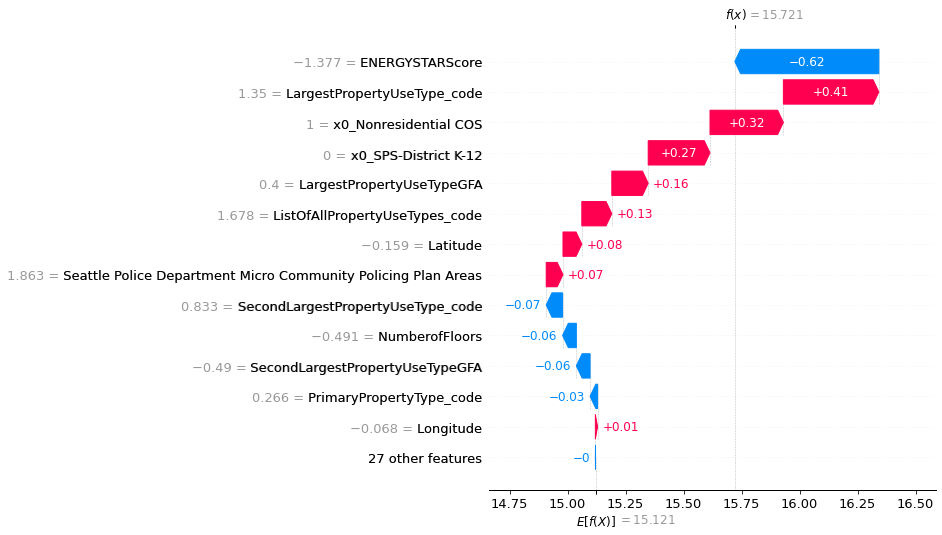

In [163]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_xgb[sample_ind], max_display=14)

Pour cette instance, la variable ENERGYSTARScore est la plus impactante pour le modèle XG Boost.

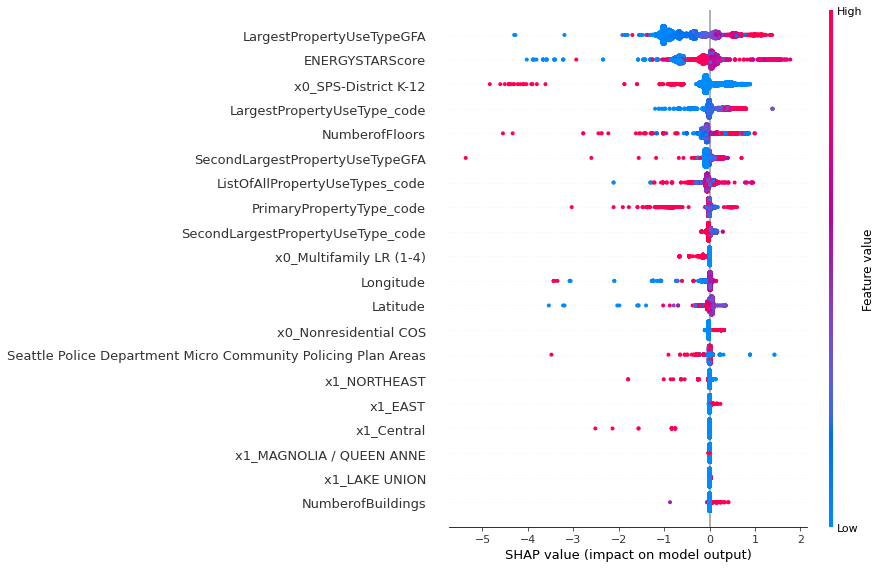

In [164]:
shap.summary_plot(shap_values_xgb, X)

Ce graphique nous par ordre d'importance des features, l'impact de chaque variable.

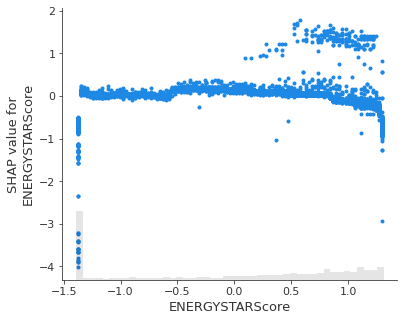

In [165]:
shap.plots.scatter(shap_values_xgb[:,"ENERGYSTARScore"])

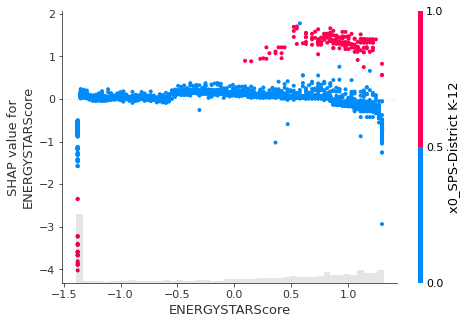

In [166]:
shap.plots.scatter(shap_values_xgb[:,'ENERGYSTARScore'], color=shap_values)

### Modèles sans ENERGYSTARScore	

In [167]:
#Réinitialisation du tableau de comparaison des modeles regression:
models_array = np.array([['Elasticnet Regression',0,0],['Random Forest Tun',0,0],['SVR',0,0],['XG Boost',0,0]])
comparative_table = pd.DataFrame(models_array, columns = ['Model','Nbre de variables','Score_RMSE'])
comparative_table

,Model,Nbre de variables,Score_RMSE
0,Elasticnet Regression,0,0
1,Random Forest Tun,0,0
2,SVR,0,0
3,XG Boost,0,0


#### Linear Regression, Ridge, Lasso et ElasticNet:

In [168]:
#Nous supprimons la variable ENERGYSTARScore pour voir son importance dans les prédictions de nos modèles:
X.drop('ENERGYSTARScore',1,inplace=True)

In [169]:
# #Normaliser les données:

# sdt_scale=preprocessing.StandardScaler().fit(X)
# X_bis_scaled=sdt_scale.transform(X)

NameError: ignored

In [172]:
#spliter les données en trainset et testset:

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape)

(4499, 39) (2217, 39)


In [173]:
#Elastic Net:

parameters = {'tol' : [0.1,0.01,0.001,0.0001],'alpha':[1, 10],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic=linear_model.ElasticNet()
gelastic= GridSearchCV(elastic,parameters,scoring = 'neg_mean_squared_error',cv=10)

gelastic.fit(X_train, y_train)

best_model_elastic = gelastic.best_estimator_
best_model_elastic.fit(X_train, y_train)

rmse_elastic=mean_squared_error(y_test,best_model_elastic.predict(X_test))
r2_elastic = r2_score(y_test,best_model_elastic.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_elastic))
print('le score R2 est {}'.format(r2_elastic))

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5932.960886738317, tolerance: 1295.9406695514265
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6143.583932627915, tolerance: 1341.3392560802968
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6128.431784376102, tolerance: 1338.3318154470335
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5831.726385777889, tolerance: 1278.4260883464142
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5956.002250848867, tolerance: 1303.4752091762875
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6114.438422610685, tolerance: 1341.9096653763706
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5919.662318543448, tolerance: 1299.0536100159911

--------------------------------------
Lerreur quadratique moyenne est 1.798392163237996
le score R2 est 0.18096167876050318


Objective did not converge. You might want to increase the number of iterations. Duality gap: 6647.723450214339, tolerance: 1454.939207199429


In [174]:
#completer le tableau:
mask=comparative_table['Model']=='Elasticnet Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_elastic
comparative_table.loc[mask,'R2']=r2_elastic
comparative_table.loc[mask,'Nbre de variables']=X_train.shape[1]

comparative_table

,Model,Nbre de variables,Score_RMSE,R2
0,Elasticnet Regression,39,1.79839,0.180962
1,Random Forest Tun,0,0,NaN
2,SVR,0,0,NaN
3,XG Boost,0,0,NaN


#### Decision Tree et Random Forest:

In [175]:
parameters = {
    'n_estimators' : [20,50,100,200,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [176]:
rfr_search.best_params_
rmse_rf=mean_squared_error(y_test,rfr_search.best_estimator_.predict(X_test))
r2_rf = r2_score(y_test,rfr_search.best_estimator_.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse_rf))

Lerreur quadratique moyenne est 1.4486474852169833


In [177]:
#completer le tableau:
mask=comparative_table['Model']=='Random Forest Tun'
comparative_table.loc[mask,'Score_RMSE']=rmse_rf
comparative_table.loc[mask,'R2']=r2_rf
comparative_table.loc[mask,'Time']=rf_running_time
comparative_table.loc[mask,'Nbre de variables']=X_train.shape[1]

comparative_table

,Model,Nbre de variables,Score_RMSE,R2,Time
0,Elasticnet Regression,39,1.79839,0.180962,NaN
1,Random Forest Tun,39,1.44865,0.340245,419.539901
2,SVR,0,0,NaN,NaN
3,XG Boost,0,0,NaN,NaN


#### SVR:

In [178]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.0s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 20.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [179]:
svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.001}

In [180]:
rmse_svr=mean_squared_error(y_test,svm.predict(X_test))
r2_svr = r2_score(y_test,svm.predict(X_test))

In [181]:
#completer le tableau:
mask=comparative_table['Model']=='SVR'
comparative_table.loc[mask,'Score_RMSE']=rmse_svr
comparative_table.loc[mask,'Time']=svm_running_time
comparative_table.loc[mask,'R2']=r2_svr

comparative_table

,Model,Nbre de variables,Score_RMSE,R2,Time
0,Elasticnet Regression,39,1.79839,0.180962,NaN
1,Random Forest Tun,39,1.44865,0.340245,419.539901
2,SVR,0,1.58485,0.278213,1258.139188
3,XG Boost,0,0,NaN,NaN


#### XG Boost:

In [182]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[18:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.214, total=   0.4s
[CV] n_estimators=100 ................................................
[18:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.157, total=   0.4s
[CV] n_estimators=100 ................................................
[18:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.299, total=   0.4s
[CV] n_estimators=100 ................................................
[18:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.191, total=   0.4s
[CV] n_estimators=100 ................................................
[18:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.172, total=   0.4s
[CV] n_estimators=500 ................................................
[18:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.157, total=   1.9s
[CV] n_estimators=500 ................................................
[18:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.063, total=   1.8s
[CV] n_estimators=500 ................................................
[18:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.316, total=   1.8s
[CV] n_estimators=500 ................................................
[18:30:44] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [183]:
print('XG Boost best parametrs: ',xgb_grid.best_params_,'XG Boost best estimator: ',xgb_grid.best_estimator_)

XG Boost best parametrs:  {'n_estimators': 100} XG Boost best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [184]:
rmse_xgb=mean_squared_error(y_test,xgb_grid.best_estimator_.predict(X_test))
r2_xgb = r2_score(y_test,xgb_grid.best_estimator_.predict(X_test))

In [185]:
#completer le tableau:
mask=comparative_table['Model']=='XG Boost'
comparative_table.loc[mask,'Score_RMSE']=rmse_xgb
comparative_table.loc[mask,'R2']=r2_xgb
comparative_table.loc[mask,'Time']=xgb_running_time

comparative_table

,Model,Nbre de variables,Score_RMSE,R2,Time
0,Elasticnet Regression,39,1.79839,0.180962,NaN
1,Random Forest Tun,39,1.44865,0.340245,419.539901
2,SVR,0,1.58485,0.278213,1258.139188
3,XG Boost,0,1.5219,0.306886,134.044791


#### Comapraison des modèles:

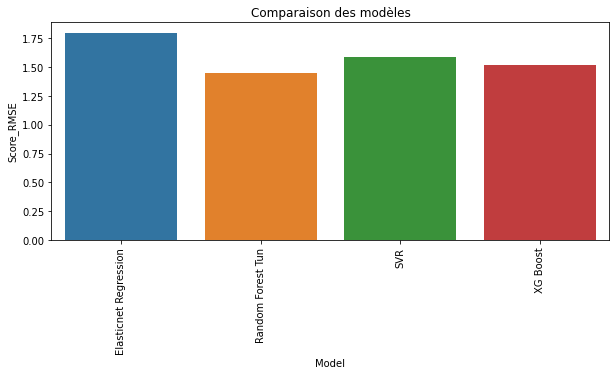

In [186]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Score_RMSE'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

In [187]:
comparative_table['Time']=comparative_table['Time'].astype(float)

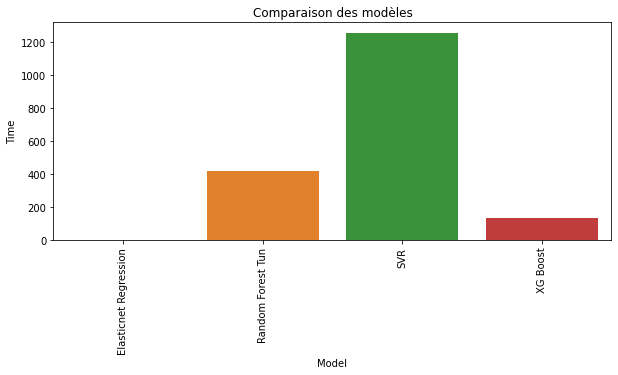

In [188]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Time'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

##### Importation du modèle:

Le modèle Random Forest est largement plus preformant mais plus XG Boost est plus rapide. Nous pouvons choisir le XG Boost pour sa rapidité et son RMSE qui n'est pas très loin de celui du Random Forest

In [189]:
filename = path_data+'Models/xgb_grid_energy_sans_StarScore.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(xgb_grid.best_estimator_, filehandler)

**En comparant le modèle choisi avec et sans la variable Energystarscore, nous constatons que: leXG Boost ainsi que tous les autres modèles testés ont pérdu en performance (RMSE plus élevé)**

#### Explicabilité du modèle choisi:

In [190]:
#XG Boost model:
explainer_xgb = shap.Explainer(xgb_grid.best_estimator_, X[:100])
shap_values_xgb = explainer_xgb(X)

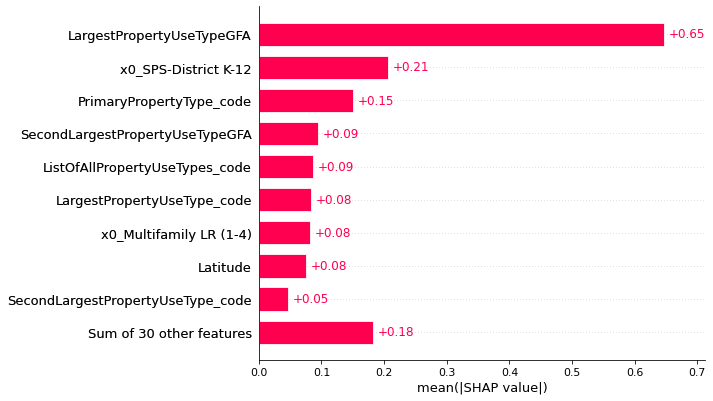

In [191]:
#Importance des variable pour le modèle XG Boost:
shap.plots.bar(shap_values_xgb)

L'ordre d'importance des features pour le modèle XG Boost a changé avec la suppréssion de la variable ENERGYSTARScore.

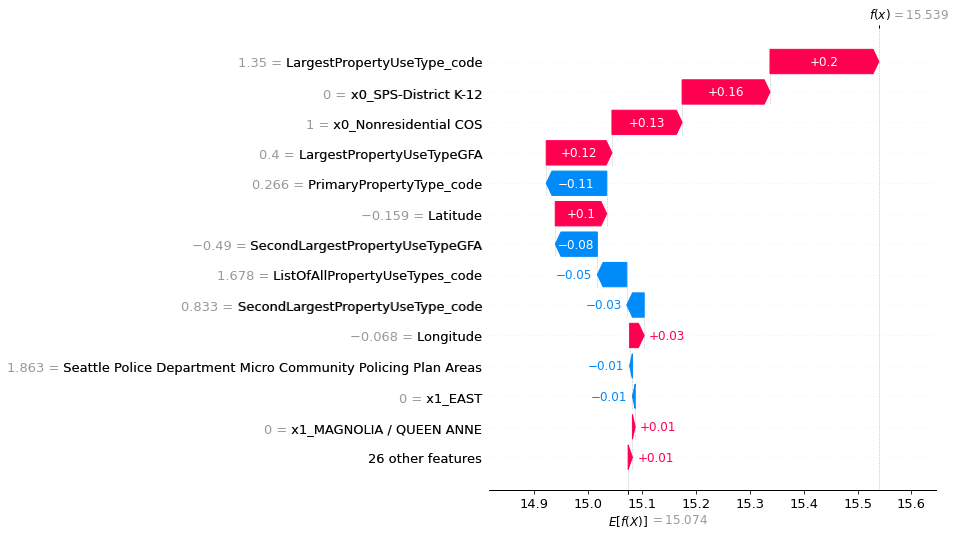

In [192]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_xgb[sample_ind], max_display=14)

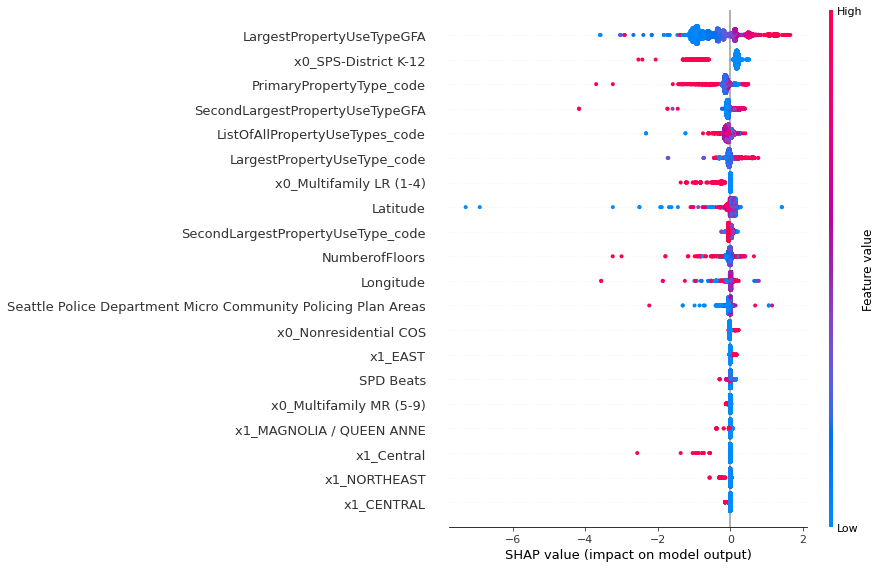

In [193]:
shap.summary_plot(shap_values_xgb, X)

## Emmision de gaz (GHGEmissions(MetricTonsCO2e)):

In [194]:
y=y_gaz

### Modèles avec ENERGYSTARScore


In [260]:
#Réinitialisation du tableau de comparaison des modeles regression:
models_array = np.array([['Elasticnet Regression',0,0],['Decision Tree',0,0],['Random Forest Tun',0,0],['SVR',0,0],['XG Boost',0,0]])
comparative_table = pd.DataFrame(models_array, columns = ['Model','Features','Score_RMSE'])
comparative_table

,Model,Features,Score_RMSE
0,Elasticnet Regression,0,0
1,Decision Tree,0,0
2,Random Forest Tun,0,0
3,SVR,0,0
4,XG Boost,0,0


#### Linear Regression, Ridge, Lasso et ElasticNet:

In [238]:
X=columns_X.copy()

In [239]:
X

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Latitude,Longitude,LargestPropertyUseType_code,ListOfAllPropertyUseTypes_code,PrimaryPropertyType_code,SecondLargestPropertyUseType_code,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DELRIDGE NEIGHBORHOODS,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST
0,-0.053558,1.335147,3.941467e-01,-0.489735,0.361131,-0.097721,1.144266,-0.248181,-0.113813,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.053558,1.152497,3.258065e-01,0.371639,-0.013264,-0.097721,1.144266,-0.229040,0.056880,-1.073572,-1.121412,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.053558,6.632005,-1.091876e-16,5.228362,-0.895767,1.862616,1.144266,-0.223957,-0.102850,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.053558,0.969847,-1.274313e-02,-0.489735,-1.350390,1.862616,1.144266,-0.205834,-0.062731,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.053558,2.431049,9.195440e-01,3.399086,0.414617,1.862616,1.144266,-0.215481,-0.221469,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,-0.053558,-0.674006,-7.484584e-01,-0.489735,-0.146976,-0.751166,-0.756599,-1.188314,0.859511,-0.086107,0.583044,0.130609,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,-0.053558,-0.674006,-6.928438e-01,-0.489735,-1.377132,-0.751166,-0.756599,-0.581422,0.444171,0.542280,1.354335,0.265829,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,-0.053558,-0.674006,-8.191546e-01,-0.171008,-1.377132,-0.751166,-0.756599,0.258777,-0.843787,0.542280,-1.511818,0.265829,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,-0.053558,-0.674006,-8.338911e-01,-0.118002,-1.377132,-0.751166,-0.756599,-2.001545,0.389724,0.542280,-1.702260,-0.139831,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
#spliter les données en trainset et testset:

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape)

(4499, 40) (2217, 40)


In [241]:
#Elastic Net:

parameters = {'tol' : [0.1,0.01,0.001,0.0001],'alpha':[1, 10],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic=linear_model.ElasticNet()
gelastic= GridSearchCV(elastic,parameters,scoring = 'neg_mean_squared_error',cv=10)

gelastic.fit(X_train, y_train)

best_model_elastic = gelastic.best_estimator_
best_model_elastic.fit(X_train, y_train)

rmse_elastic=mean_squared_error(y_test,best_model_elastic.predict(X_test))
r2_elastic = r2_score(y_test,best_model.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_elastic))
print('le score R2 est {}'.format(r2_elastic))

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5536.5196364547855, tolerance: 1218.448420048159
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5744.901124943177, tolerance: 1261.6683692780116
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5571.1788135455945, tolerance: 1234.280357273602
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6041.834650111039, tolerance: 1318.1543251204882
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5953.889769168646, tolerance: 1301.323609001892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5701.74743487902, tolerance: 1256.6056344324606
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5675.421675331953, tolerance: 1248.9000274691427
O

--------------------------------------
Lerreur quadratique moyenne est 2.1161988120594426
le score R2 est 0.19524185897258728


Objective did not converge. You might want to increase the number of iterations. Duality gap: 6337.977251909235, tolerance: 1392.9684935529885


In [261]:
#completer le tableau:
mask=comparative_table['Model']=='Elasticnet Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_elastic
comparative_table.loc[mask,'R2']=r2_elastic
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2
0,Elasticnet Regression,40,2.1162,0.195242
1,Decision Tree,0,0,NaN
2,Random Forest Tun,0,0,NaN
3,SVR,0,0,NaN
4,XG Boost,0,0,NaN


#### Decision Tree et Random Forest:

In [243]:
#Arbre de décision:

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

rmse_dtr=mean_squared_error(y_test,dtr.predict(X_test))
r2_dtr = r2_score(y_test,dtr.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse_dtr))


Lerreur quadratique moyenne est 2.6198131593565335


In [262]:
#completer le tableau:
mask=comparative_table['Model']=='Decision Tree'
comparative_table.loc[mask,'Score_RMSE']=rmse_dtr
comparative_table.loc[mask,'R2']=r2_dtr
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2
0,Elasticnet Regression,40,2.1162,0.195242
1,Decision Tree,40,2.61981,-0.056704
2,Random Forest Tun,0,0,NaN
3,SVR,0,0,NaN
4,XG Boost,0,0,NaN


In [245]:
parameters = {
    'n_estimators' : [20,50,100,200,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.7s
[CV] max_features=auto, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [246]:
rfr_search.best_params_
rmse_rf=mean_squared_error(y_test,rfr_search.best_estimator_.predict(X_test))
r2_rf = r2_score(y_test,rfr_search.best_estimator_.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse_rf))

Lerreur quadratique moyenne est 1.4220355587060844


In [263]:
#completer le tableau:
mask=comparative_table['Model']=='Random Forest Tun'
comparative_table.loc[mask,'Score_RMSE']=rmse_rf
comparative_table.loc[mask,'R2']=r2_rf
comparative_table.loc[mask,'Time']=rf_running_time
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,40,2.1162,0.195242,NaN
1,Decision Tree,40,2.61981,-0.056704,NaN
2,Random Forest Tun,40,1.42204,0.426421,419.539901
3,SVR,0,0,NaN,NaN
4,XG Boost,0,0,NaN,NaN


#### SVR:

In [248]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   2.0s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 20.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [249]:
svm.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

In [250]:
rmse_svr=mean_squared_error(y_test,svm.predict(X_test))
r2_svr = r2_score(y_test,svm.predict(X_test))

In [265]:
#completer le tableau:
mask=comparative_table['Model']=='SVR'
comparative_table.loc[mask,'Score_RMSE']=rmse_svr
comparative_table.loc[mask,'Time']=svm_running_time
comparative_table.loc[mask,'R2']=r2_svr

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,40,2.1162,0.195242,NaN
1,Decision Tree,40,2.61981,-0.056704,NaN
2,Random Forest Tun,40,1.42204,0.426421,419.539901
3,SVR,0,1.49778,0.395871,1258.139188
4,XG Boost,0,1.38309,0.442128,134.044791


#### XG Boost:

In [252]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[19:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.358, total=   0.5s
[CV] n_estimators=100 ................................................
[19:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.446, total=   0.4s
[CV] n_estimators=100 ................................................
[19:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.288, total=   0.4s
[CV] n_estimators=100 ................................................
[19:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.342, total=   0.4s
[CV] n_estimators=100 ................................................
[19:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.456, total=   0.4s
[CV] n_estimators=500 ................................................
[19:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.391, total=   1.9s
[CV] n_estimators=500 ................................................
[19:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.387, total=   1.9s
[CV] n_estimators=500 ................................................
[19:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.188, total=   1.9s
[CV] n_estimators=500 ................................................
[19:48:57] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [253]:
print('XG Boost best parametrs: ',xgb_grid.best_params_,'XG Boost best estimator: ',xgb_grid.best_estimator_)

XG Boost best parametrs:  {'n_estimators': 100} XG Boost best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [254]:
rmse_xgb=mean_squared_error(y_test,xgb_grid.best_estimator_.predict(X_test))
r2_xgb = r2_score(y_test,xgb_grid.best_estimator_.predict(X_test))

In [264]:
#completer le tableau:
mask=comparative_table['Model']=='XG Boost'
comparative_table.loc[mask,'Score_RMSE']=rmse_xgb
comparative_table.loc[mask,'R2']=r2_xgb
comparative_table.loc[mask,'Time']=xgb_running_time

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,40,2.1162,0.195242,NaN
1,Decision Tree,40,2.61981,-0.056704,NaN
2,Random Forest Tun,40,1.42204,0.426421,419.539901
3,SVR,0,0,NaN,NaN
4,XG Boost,0,1.38309,0.442128,134.044791


#### Comapraison des modèles:

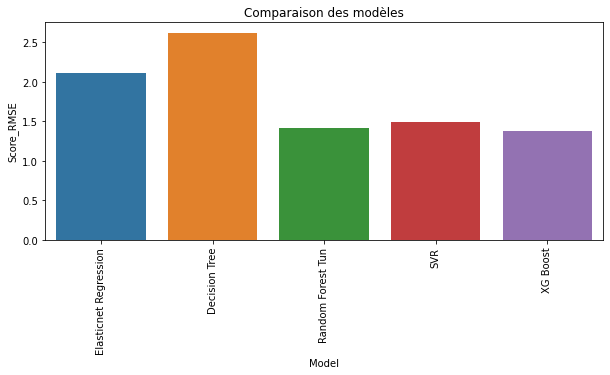

In [266]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Score_RMSE'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

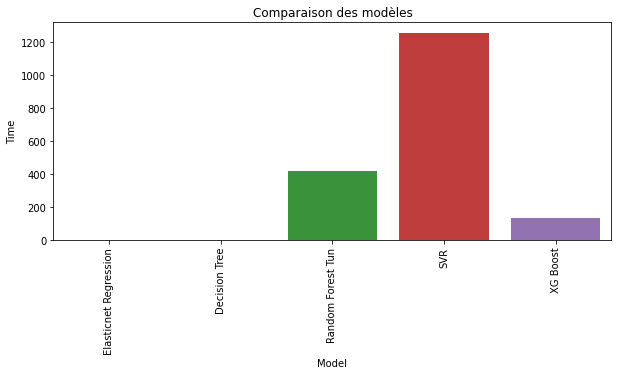

In [267]:
comparative_table['Time']=comparative_table['Time'].astype(float)

plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Time'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

##### Importation du modèle:

In [268]:
filename = path_data+'Models/xgb_grid_gaz.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(xgb_grid.best_estimator_, filehandler)

#### Explicabilité du modèle choisi:

In [269]:
#XG Boost model:
explainer_xgb = shap.Explainer(xgb_grid.best_estimator_, X[:100])
shap_values_xgb = explainer_xgb(X)

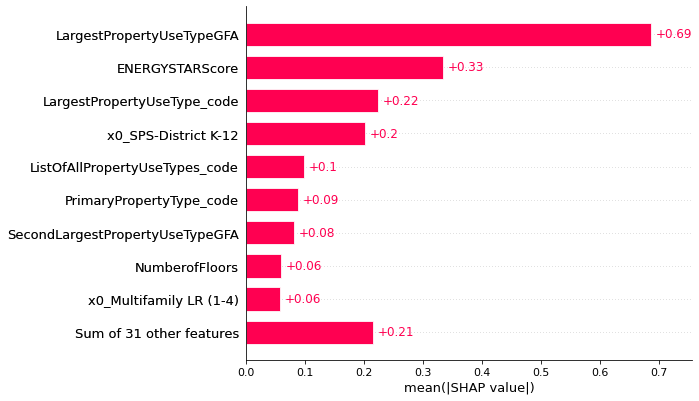

In [270]:
#Importance des variable pour le modèle XG Boost:
shap.plots.bar(shap_values_xgb)

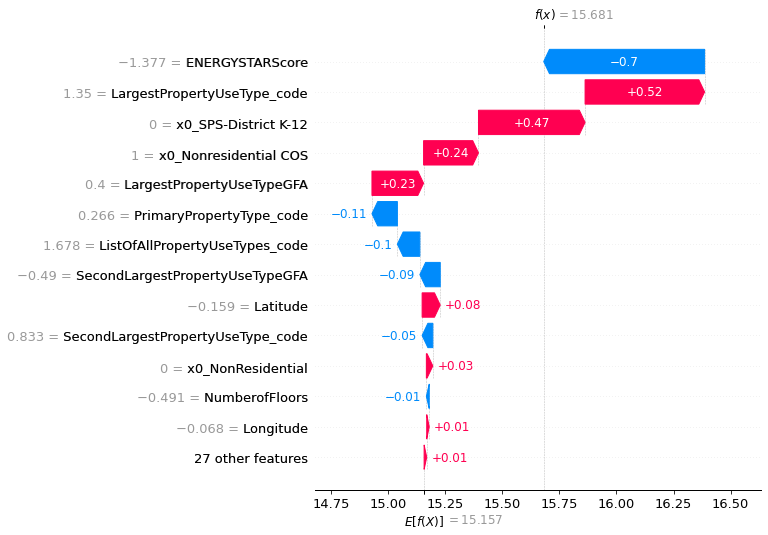

In [271]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_xgb[sample_ind], max_display=14)

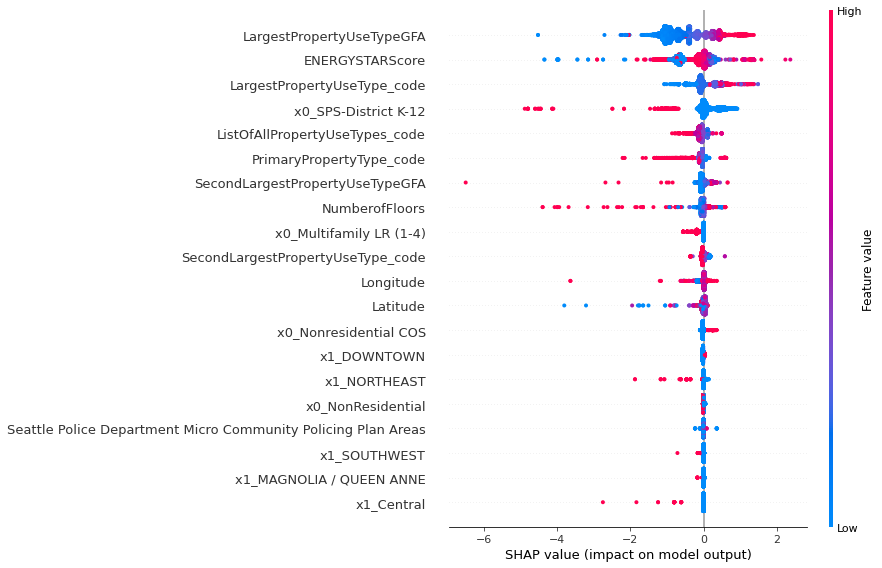

In [272]:
shap.summary_plot(shap_values_xgb, X)

In [ ]:
#ENERGYSTARScore est la 2ème plus importante variable pour le modèle

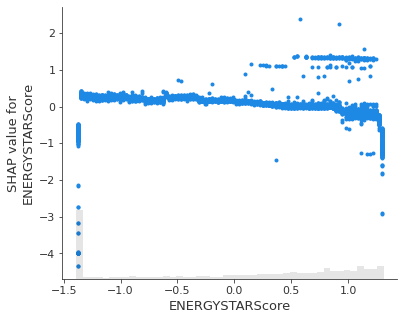

In [273]:
shap.plots.scatter(shap_values_xgb[:,"ENERGYSTARScore"])

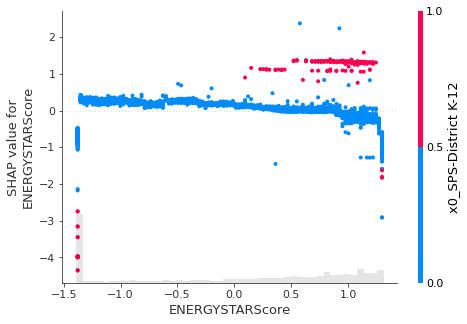

In [274]:
shap.plots.scatter(shap_values_xgb[:,'ENERGYSTARScore'], color=shap_values)

### Modèles sans ENERGYSTARScore


In [305]:
#Réinitialisation du tableau de comparaison des modeles regression:
models_array = np.array([['Elasticnet Regression',0,0],['Random Forest Tun',0,0],['SVR',0,0],['XG Boost',0,0]])
comparative_table = pd.DataFrame(models_array, columns = ['Model','Features','Score_RMSE'])
comparative_table

,Model,Features,Score_RMSE
0,Elasticnet Regression,0,0
1,Random Forest Tun,0,0
2,SVR,0,0
3,XG Boost,0,0


#### Linear Regression, Ridge, Lasso et ElasticNet:

In [276]:
columns_X

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Latitude,Longitude,LargestPropertyUseType_code,ListOfAllPropertyUseTypes_code,PrimaryPropertyType_code,SecondLargestPropertyUseType_code,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DELRIDGE NEIGHBORHOODS,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST
0,-0.053558,1.335147,3.941467e-01,-0.489735,0.361131,-0.097721,1.144266,-0.248181,-0.113813,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.053558,1.152497,3.258065e-01,0.371639,-0.013264,-0.097721,1.144266,-0.229040,0.056880,-1.073572,-1.121412,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.053558,6.632005,-1.091876e-16,5.228362,-0.895767,1.862616,1.144266,-0.223957,-0.102850,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.053558,0.969847,-1.274313e-02,-0.489735,-1.350390,1.862616,1.144266,-0.205834,-0.062731,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.053558,2.431049,9.195440e-01,3.399086,0.414617,1.862616,1.144266,-0.215481,-0.221469,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,-0.053558,-0.674006,-7.484584e-01,-0.489735,-0.146976,-0.751166,-0.756599,-1.188314,0.859511,-0.086107,0.583044,0.130609,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,-0.053558,-0.674006,-6.928438e-01,-0.489735,-1.377132,-0.751166,-0.756599,-0.581422,0.444171,0.542280,1.354335,0.265829,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,-0.053558,-0.674006,-8.191546e-01,-0.171008,-1.377132,-0.751166,-0.756599,0.258777,-0.843787,0.542280,-1.511818,0.265829,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,-0.053558,-0.674006,-8.338911e-01,-0.118002,-1.377132,-0.751166,-0.756599,-2.001545,0.389724,0.542280,-1.702260,-0.139831,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
#Nous supprimons la variable ENERGYSTARScore pour voir son importance dans les prédictions de nos modèles:
X.drop('ENERGYSTARScore',1,inplace=True)

In [278]:
X

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Latitude,Longitude,LargestPropertyUseType_code,ListOfAllPropertyUseTypes_code,PrimaryPropertyType_code,SecondLargestPropertyUseType_code,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_BALLARD,x1_Ballard,x1_CENTRAL,x1_Central,x1_DELRIDGE,x1_DELRIDGE NEIGHBORHOODS,x1_DOWNTOWN,x1_Delridge,x1_EAST,x1_GREATER DUWAMISH,x1_LAKE UNION,x1_MAGNOLIA / QUEEN ANNE,x1_NORTH,x1_NORTHEAST,x1_NORTHWEST,x1_North,x1_Northwest,x1_SOUTHEAST,x1_SOUTHWEST
0,-0.053558,1.335147,3.941467e-01,-0.489735,-0.097721,1.144266,-0.248181,-0.113813,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.053558,1.152497,3.258065e-01,0.371639,-0.097721,1.144266,-0.229040,0.056880,-1.073572,-1.121412,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.053558,6.632005,-1.091876e-16,5.228362,1.862616,1.144266,-0.223957,-0.102850,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.053558,0.969847,-1.274313e-02,-0.489735,1.862616,1.144266,-0.205834,-0.062731,-1.073572,-1.197589,-1.086370,0.832522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.053558,2.431049,9.195440e-01,3.399086,1.862616,1.144266,-0.215481,-0.221469,-1.073572,-1.073801,-1.086370,-0.688122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,-0.053558,-0.674006,-7.484584e-01,-0.489735,-0.751166,-0.756599,-1.188314,0.859511,-0.086107,0.583044,0.130609,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,-0.053558,-0.674006,-6.928438e-01,-0.489735,-0.751166,-0.756599,-0.581422,0.444171,0.542280,1.354335,0.265829,0.832522,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,-0.053558,-0.674006,-8.191546e-01,-0.171008,-0.751166,-0.756599,0.258777,-0.843787,0.542280,-1.511818,0.265829,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,-0.053558,-0.674006,-8.338911e-01,-0.118002,-0.751166,-0.756599,-2.001545,0.389724,0.542280,-1.702260,-0.139831,-2.874049,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# #Normaliser les données:

# sdt_scale=preprocessing.StandardScaler().fit(X)
# X_bis_scaled=sdt_scale.transform(X)

In [279]:
#spliter les données en trainset et testset:

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape)

(4499, 39) (2217, 39)


In [282]:
#Elastic Net:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],'alpha':[1, 10],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic=linear_model.ElasticNet()
gelastic= GridSearchCV(elastic,parameters,scoring = 'neg_mean_squared_error',cv=10)

gelastic.fit(X_train, y_train)

best_model_elastic = gelastic.best_estimator_
best_model_elastic.fit(X_train, y_train)

rmse_elastic=mean_squared_error(y_test,best_model_elastic.predict(X_test))
r2_elastic = r2_score(y_test,best_model_elastic.predict(X_test))
 
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse_elastic))
print('le score R2 est {}'.format(r2_elastic))

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5070.552436633711, tolerance: 1126.046278651305
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5104.982013333683, tolerance: 1135.513582979818
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5251.21018283199, tolerance: 1162.8585438633613
Objective did not converge. You might want to increase the number of iterations. Duality gap: 4911.600652228074, tolerance: 1092.0424492680224
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5249.274508495151, tolerance: 1162.5383267705151
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5153.8151910936585, tolerance: 1145.6349596321759
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5251.721984407185, tolerance: 1162.4074345897059
O

--------------------------------------
Lerreur quadratique moyenne est 2.70914490546686
le score R2 est 0.12648725735239585


Objective did not converge. You might want to increase the number of iterations. Duality gap: 5644.000515567233, tolerance: 1255.402921965141


In [306]:
#completer le tableau:
mask=comparative_table['Model']=='Elasticnet Regression'
comparative_table.loc[mask,'Score_RMSE']=rmse_elastic
comparative_table.loc[mask,'R2']=r2_elastic
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2
0,Elasticnet Regression,39,2.70914,0.126487
1,Random Forest Tun,0,0,NaN
2,SVR,0,0,NaN
3,XG Boost,0,0,NaN


#### Decision Tree et Random Forest:

In [287]:
parameters = {
    'n_estimators' : [20,50,100,200,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=20 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=20, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   1.6s
[CV] max_features=auto, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [288]:
rfr_search.best_params_
rmse_rf=mean_squared_error(y_test,rfr_search.best_estimator_.predict(X_test))
r2_rf = r2_score(y_test,rfr_search.best_estimator_.predict(X_test))

print('Lerreur quadratique moyenne est {}'.format(rmse_rf))

Lerreur quadratique moyenne est 2.30170496518113


In [307]:
#completer le tableau:
mask=comparative_table['Model']=='Random Forest Tun'
comparative_table.loc[mask,'Score_RMSE']=rmse_rf
comparative_table.loc[mask,'R2']=r2_rf
comparative_table.loc[mask,'Time']=rf_running_time
comparative_table.loc[mask,'Features']=X_train.shape[1]

comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,39,2.70914,0.126487,NaN
1,Random Forest Tun,39,2.3017,0.257859,419.539901
2,SVR,0,0,NaN,NaN
3,XG Boost,0,0,NaN,NaN


#### SVR:

In [290]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-08 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-08, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.8s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .............. C=0.001, epsilon=0.001, gamma=1e-07, total=   1.9s
[CV] C=0.001, epsilon=0.001, gamma=1e-07 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 20.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [291]:
svm.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.1}

In [292]:
rmse_svr=mean_squared_error(y_test,svm.predict(X_test))
r2_svr = r2_score(y_test,svm.predict(X_test))

In [308]:
#completer le tableau:
mask=comparative_table['Model']=='SVR'
comparative_table.loc[mask,'Score_RMSE']=rmse_svr
comparative_table.loc[mask,'Time']=svm_running_time
comparative_table.loc[mask,'R2']=r2_svr
comparative_table.loc[mask,'Features']=X_train.shape[1]


comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,39,2.70914,0.126487,NaN
1,Random Forest Tun,39,2.3017,0.257859,419.539901
2,SVR,39,2.47789,0.201050,1258.139188
3,XG Boost,0,0,NaN,NaN


#### XG Boost:

In [294]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[20:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.285, total=   0.4s
[CV] n_estimators=100 ................................................
[20:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.192, total=   0.4s
[CV] n_estimators=100 ................................................
[20:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.050, total=   0.4s
[CV] n_estimators=100 ................................................
[20:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.188, total=   0.4s
[CV] n_estimators=100 ................................................
[20:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.138, total=   0.4s
[CV] n_estimators=500 ................................................
[20:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.278, total=   1.9s
[CV] n_estimators=500 ................................................
[20:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.094, total=   1.9s
[CV] n_estimators=500 ................................................
[20:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... n_estimators=500, score=-0.102, total=   1.8s
[CV] n_estimators=500 ................................................
[20:26:16] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [295]:
print('XG Boost best parametrs: ',xgb_grid.best_params_,'XG Boost best estimator: ',xgb_grid.best_estimator_)

XG Boost best parametrs:  {'n_estimators': 100} XG Boost best estimator:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [296]:
rmse_xgb=mean_squared_error(y_test,xgb_grid.best_estimator_.predict(X_test))
r2_xgb = r2_score(y_test,xgb_grid.best_estimator_.predict(X_test))

In [309]:
#completer le tableau:
mask=comparative_table['Model']=='XG Boost'
comparative_table.loc[mask,'Score_RMSE']=rmse_xgb
comparative_table.loc[mask,'R2']=r2_xgb
comparative_table.loc[mask,'Time']=xgb_running_time
comparative_table.loc[mask,'Features']=X_train.shape[1]


comparative_table

,Model,Features,Score_RMSE,R2,Time
0,Elasticnet Regression,39,2.70914,0.126487,NaN
1,Random Forest Tun,39,2.3017,0.257859,419.539901
2,SVR,39,2.47789,0.201050,1258.139188
3,XG Boost,39,2.43849,0.213756,134.044791


#### Comapraison des modèles:

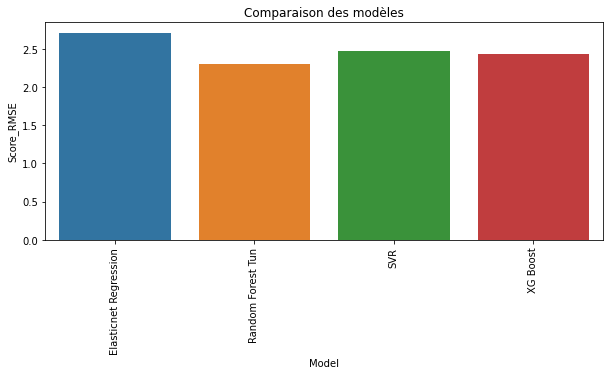

In [310]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Score_RMSE'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

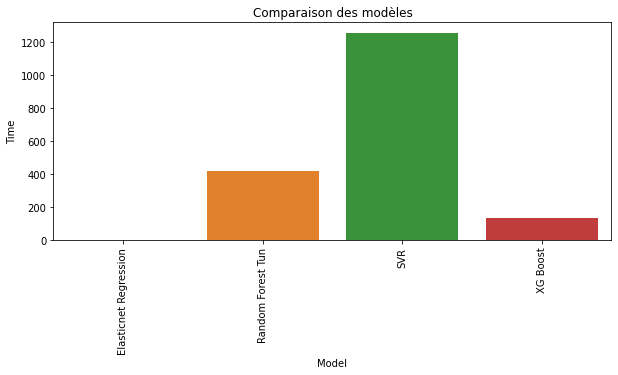

In [311]:
comparative_table['Time']=comparative_table['Time'].astype(float)

plt.figure(figsize=(10,4))
plt.title('Comparaison des modèles')
chart = sns.barplot(x = comparative_table['Model'],
           y = comparative_table['Time'])
chart.set_xticklabels(labels = comparative_table['Model'], 
                      rotation=90
                     )
ax = plt.gca()
plt.show()

##### Importation du modèle:

Le random Forest est sensiblement meilleur en RMSE que les autres modèles

In [314]:
filename = path_data+'Models/rfr_search_gaz_sans_StarScore.obj' 
with  open(filename, 'wb') as filehandler:
    pickle.dump(rfr_search.best_estimator_, filehandler)

#### Explicabilité du modèle choisi:

In [301]:
#XG Boost model:
explainer_rf = shap.Explainer(rfr_search.best_estimator_, X[:100])
shap_values_rf = explainer_rf(X)

100%|===================| 6711/6716 [19:50<00:00]       

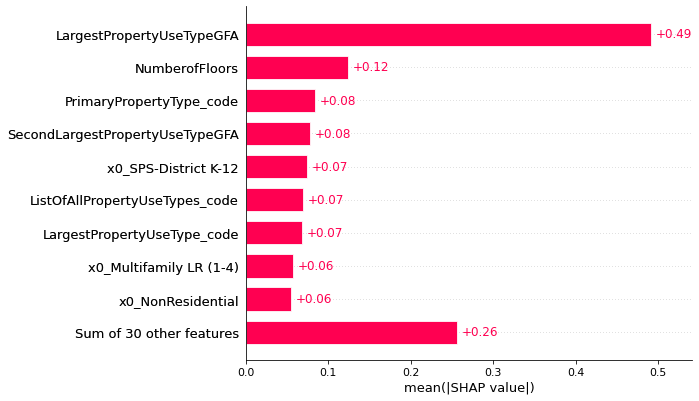

In [302]:
#Importance des variable pour le modèle XG Boost:
shap.plots.bar(shap_values_rf)

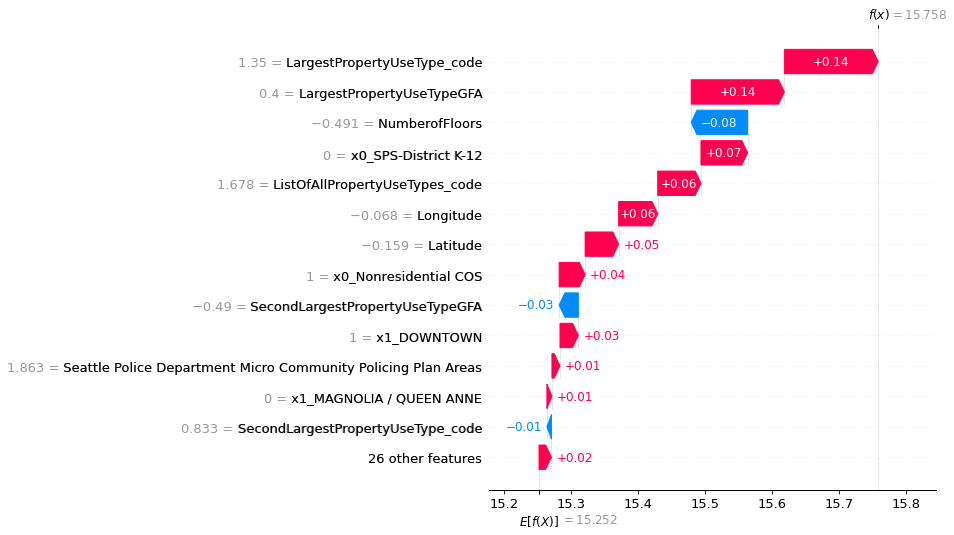

In [303]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_rf[sample_ind], max_display=14)

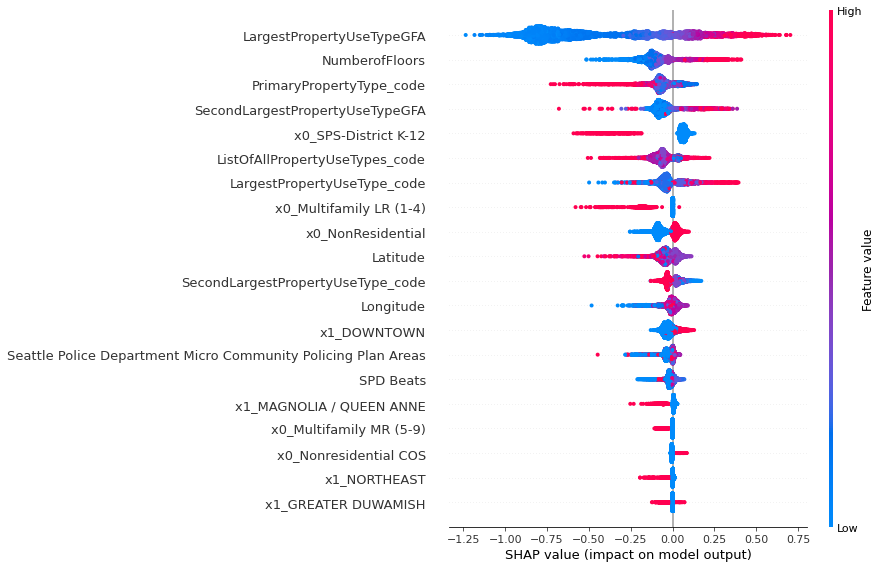

In [304]:
shap.summary_plot(shap_values_rf, X)

# Conclusion:

Nous avons utilisé les modèles:

  -Regressoin Linaire (Ridge, Lasso et ElasticNet)

  -Arbre de décision et forêt aléatoire

  -SVR
  
  -XG Boost

Pour chaque modèle nous avons optimisé les hyperparatètres afin d'avoir un résultat meilleur.

Pour comprendre l'importance de la variable "ENERGYSTARScore" nous avons fait tourné tous les modèles (pour la prédiction de consommation en énergie et pour l'emission de gaz) avec et sans cette variable. Nous avons également étudié son importanec de près avec SHAP.
